In [42]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

from sklearn import datasets, linear_model
from sklearn.tree import DecisionTreeRegressor


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston = datasets.load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
df_boston = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df_target = pd.DataFrame(data=boston.target, columns=['MEDV'])

In [5]:
df_boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [6]:
df_boston.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  506.000000  
mean    12.653063  
std      7.141062  
min      1.730000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     37.970000

# Análisis exploratorio

A mí me gustaría encontrar correlaciones entre variables explicativas y la variable target. No tiene mucho sentido hacer análisis exploratorio sobre las variables target porque sería como pensar que quiero hacer una regresión a alguna de las variables explicativas. Para eso debería generar un dataframe que tenga todas las variables

In [7]:
df_total = pd.concat([df_boston, df_target], axis=1)
df_total.head(5)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [8]:
df_target['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

Observaré la distribución de la variable *target*, comparándola con una distribución normal

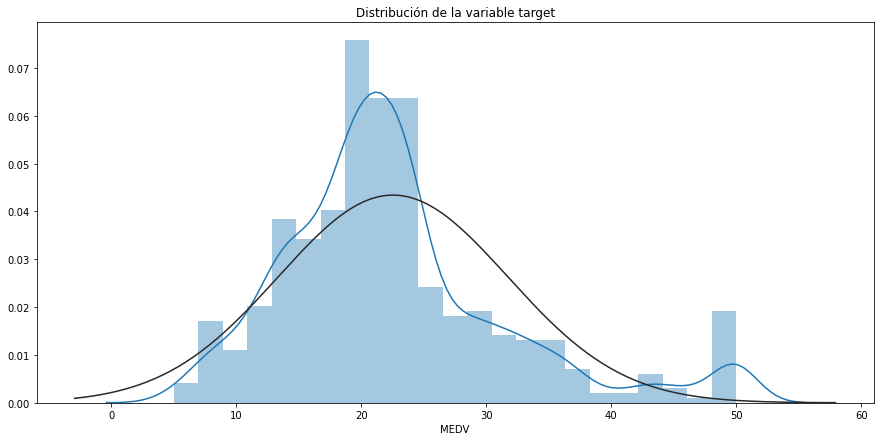

In [9]:
from scipy.stats import norm

fig, ax = plt.subplots(figsize=(15,7))
sns.distplot(ax=ax, a=df_target['MEDV'], fit=norm)
plt.title('Distribución de la variable target')

plt.show()

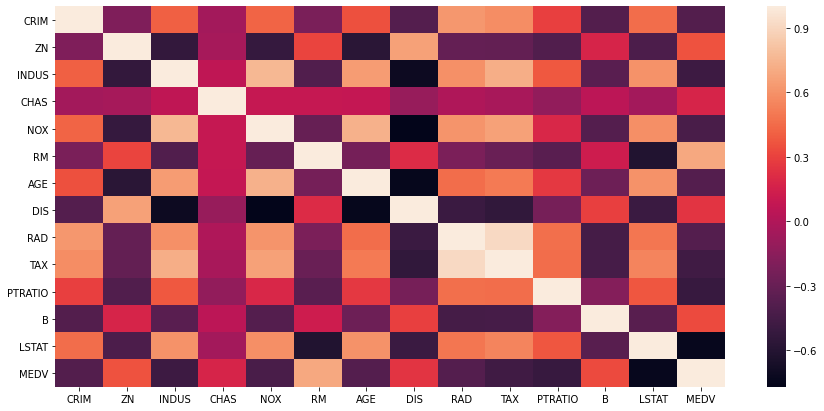

In [10]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(ax=ax, data=df_total.corr())
plt.show()

La variable ```MEDV``` parece estar correlacionada con ```LSTAT```, ```PTRATIO``` y ```RM```. A continuación genero un pairplot para observar cómo se relacionan estas variables

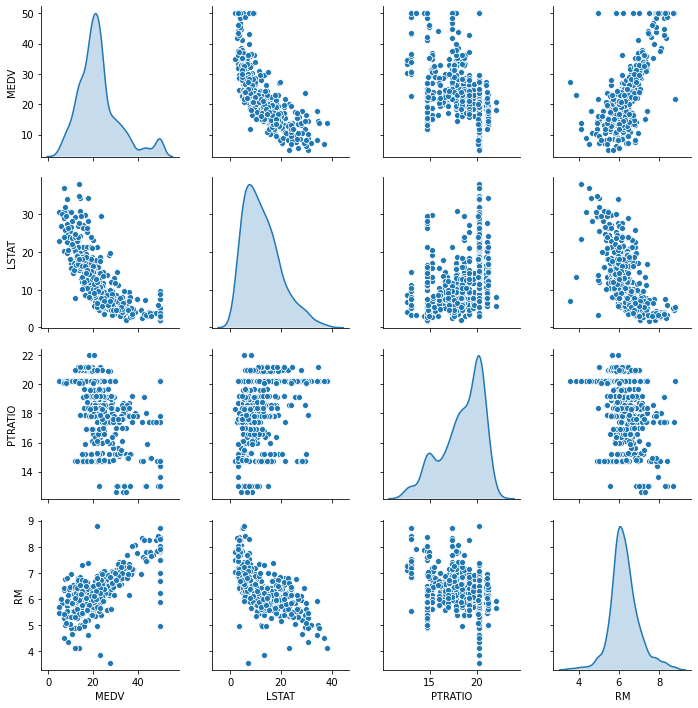

In [11]:
sns.pairplot(df_total[['MEDV', 'LSTAT', 'PTRATIO', 'RM']], diag_kind='kde')
plt.show()

Hay una relación clara entre ```MEDV``` y ```LSTAT``` y ```RM```. Creo que esta información es suficiente para correr una regresión lineal.

Primero probaré hacer regresiones con ```LSTAT``` y ```RM``` solas, y luego lo probaré juntando las dos.

# Análisis predictivo

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_boston, df_target, test_size=0.30, random_state=53)

## Benchmarking

Voy a empezar por entrenar algunos modelos básicos:
- Regresión lineal con todas las variables del dataset.
- Regresión lineal con una variables correlacionadas 
- Regresión lineal con las dos variables corelacionadas.

### Todas las variables

In [13]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.7708092893306867


El R2 es bastante bueno, pero baja un poco la performance en test.

In [14]:
treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [15]:
ytrain_pred_treereg = treereg.predict(X_train)
print(f'Score en train: {r2_score(y_train, ytrain_pred_treereg)}')

ytest_pred_treereg = treereg.predict(X_test)
print(f'Score en test: {r2_score(y_test, ytest_pred_treereg)}')

Score en train: 1.0
Score en test: 0.736091190458217


Lo que pasó acá es un poco raro. El árbol de regresión está *overfiteando* los datos de train, pero igual da resultados bastante buenos en test. Cuando cambio el random_state del ```train_test_split``` eso no se mantiene -el score de test pasa a ser bastante peor que el de la regresión lineal simple-. De todos modos, ajustar el árbol de regresión permite evaluar la importancia de cada *feature*:

In [16]:
df_feature_importances = pd.DataFrame({'atributo': df_boston.columns, 'importancia':treereg.feature_importances_})
df_feature_importances.sort_values(by='importancia', ascending=False)

atributo  importancia
5        RM     0.610691
12    LSTAT     0.201779
4       NOX     0.049566
7       DIS     0.041801
10  PTRATIO     0.035730
11        B     0.014127
0      CRIM     0.013674
6       AGE     0.010685
3      CHAS     0.010124
9       TAX     0.009589
2     INDUS     0.001055
8       RAD     0.000605
1        ZN     0.000574

Veré cómo evoluciona utilizando sólo las variables correlacionadas

<hr>

### Variable ```LSTAT```

In [17]:
model = lm.fit(X_train[['LSTAT']], y_train)
model.score(X_train[['LSTAT']], y_train)

0.559171252772887

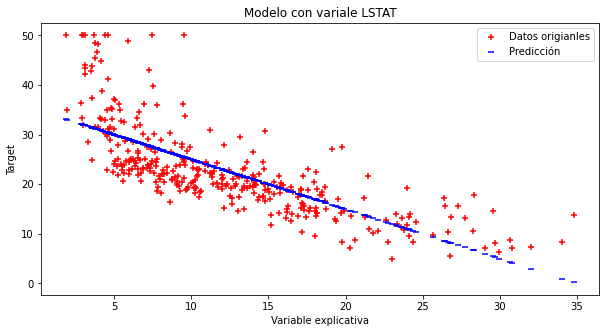

In [18]:
predictions = model.predict(X_train[['LSTAT']])

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X_train[['LSTAT']], y_train, c='r', marker='+', label='Datos origianles')
ax.scatter(X_train[['LSTAT']], predictions, c='b', marker='_', label='Predicción')
plt.xlabel('Variable explicativa')
plt.ylabel('Target')
plt.title('Modelo con variale LSTAT')
plt.legend()
plt.show()

In [19]:
y_test_pred = model.predict(X_test[['LSTAT']])
r2_score(y_test, y_test_pred)

0.5020347417716379

### Variable ```RM```

In [20]:
model = lm.fit(X_train[['RM']], y_train)
model.score(X_train[['RM']], y_train)

0.5043260541851042

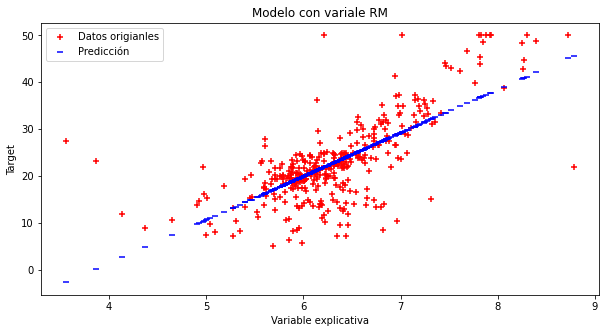

In [21]:
predictions = model.predict(X_train[['RM']])

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X_train[['RM']], y_train, c='r', marker='+', label='Datos origianles')
ax.scatter(X_train[['RM']], predictions, c='b', marker='_', label='Predicción')
plt.xlabel('Variable explicativa')
plt.ylabel('Target')
plt.title('Modelo con variale RM')
plt.legend()
plt.show()

In [22]:
y_test_pred = model.predict(X_test[['RM']])
r2_score(y_test, y_test_pred)

0.43446016565549084

### Variables ```LSTAT``` y ```RM```

In [23]:
model = lm.fit(X_train[['LSTAT', 'RM']], y_train)
model.score(X_train[['LSTAT', 'RM']], y_train)

0.6736583691036304

In [24]:
yt_pred = model.predict(X_test[['LSTAT', 'RM']])
r2_score(y_test, yt_pred)

0.5521259818194557

### Conclusión

Las dos variables correlacionadas con el target por sí solas explican buena parte de la varianza, pero sus resultados no son tan buenos como los que se obtienen con todo el dataset. Sin embargo, utilizando las dos se explica una proporción mayor de la varianza, por lo que parece que éstas dos son, en buena medida, las responsables del éxito del dataset entero.

Los gráficos de las variables aisladas también revelan que los modelos podrían beneficiarse de incluir variables polinómicas. Probemos eso.

<hr>

## Regresión polinómica

En primer lugar, defino una función para generar un pipeline que comience creando variables polinómicas para entrenar un modelo de regresión lineal.

In [25]:
def PolynomialRegression(degree=2, **kwargs):
    return Pipeline([
        ('polynomialfeatures',PolynomialFeatures(degree, include_bias=False)),
        ('linearregression', linear_model.LinearRegression(**kwargs))
    ])

### Variable ```LSTAT```

In [26]:
model = PolynomialRegression(3).fit(X_train[['LSTAT']], y_train)
model.score(X_train[['LSTAT']], y_train)

0.6434725279364459

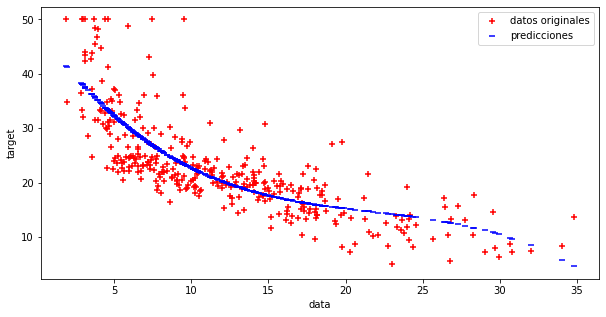

In [27]:
predictions = model.predict(X_train[['LSTAT']])

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X_train[['LSTAT']], y_train, c='r', marker='+', label='datos originales')
ax.scatter(X_train[['LSTAT']], predictions, c='blue', marker='_', label='predicciones')
plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()

Efectivamente se ve bastante mejor. Veamos qué elección del hiperparámetro ```degree``` optimiza mejor la relación sesgo-varianza

In [28]:
degree = np.arange(1,15)
train_score, test_score = validation_curve(
    PolynomialRegression(),
    X_train[['LSTAT']],
    y_train,
    'polynomialfeatures__degree',
    degree,
    cv=5
)

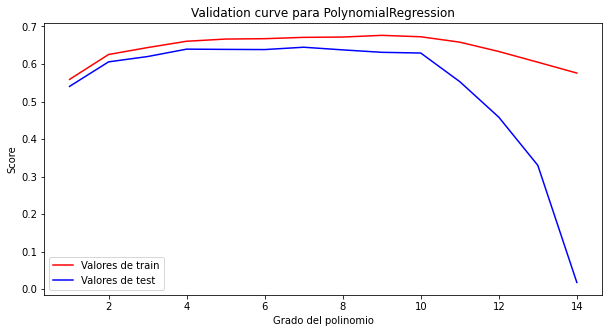

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(degree, np.mean(train_score, axis=1), c='r', label='Valores de train')
ax.plot(degree, np.mean(test_score, axis=1), c='b', label='Valores de test')
plt.xlabel('Grado del polinomio')
plt.ylabel('Score')
plt.title('Validation curve para PolynomialRegression')
plt.legend()
plt.show()

In [30]:
y_test_pred = model.predict(X_test[['LSTAT']])
r2_score(y_test, y_test_pred)

0.6613921590940685

### Variable ```RM```

In [31]:
model = PolynomialRegression(3).fit(X_train[['RM']], y_train)
model.score(X_train[['RM']], y_train)

0.5928319620715731

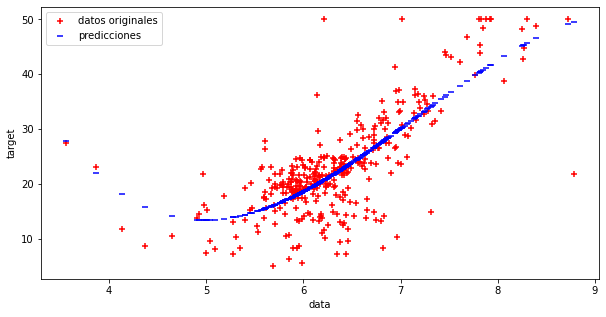

In [32]:
predictions = model.predict(X_train[['RM']])

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X_train[['RM']], y_train, c='r', marker='+', label='datos originales')
ax.scatter(X_train[['RM']], predictions, c='blue', marker='_', label='predicciones')
plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()

In [33]:
y_test_pred = model.predict(X_test[['RM']])
r2_score(y_test, y_test_pred)

0.48720166269845755

Efectivamente se ve bastante mejor. Veamos qué elección del hiperparámetro ```degree``` optimiza mejor la relación sesgo-varianza

In [34]:
degree = np.arange(1,15)
train_score, test_score = validation_curve(
    PolynomialRegression(),
    X_train[['RM']],
    y_train,
    'polynomialfeatures__degree',
    degree,
    cv=5
)

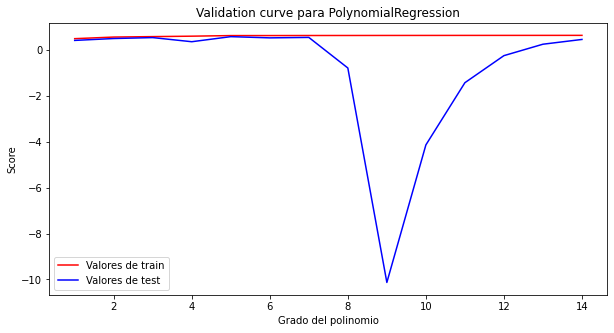

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(degree, np.mean(train_score, axis=1), c='r', label='Valores de train')
ax.plot(degree, np.mean(test_score, axis=1), c='b', label='Valores de test')
plt.xlabel('Grado del polinomio')
plt.ylabel('Score')
plt.title('Validation curve para PolynomialRegression')
plt.legend()
plt.show()

### Variables ```LSTAT``` y ```RM```

In [36]:
model = PolynomialRegression(3).fit(X_train[['LSTAT', 'RM']], y_train)
model.score(X_train[['LSTAT', 'RM']], y_train)

0.8025746965619852

Efectivamente se ve bastante mejor. Veamos qué elección del hiperparámetro ```degree``` optimiza mejor la relación sesgo-varianza

In [37]:
degree = np.arange(1,10)
train_score, test_score = validation_curve(
    PolynomialRegression(),
    X_train[['LSTAT', 'RM']],
    y_train,
    'polynomialfeatures__degree',
    degree,
    cv=5
)

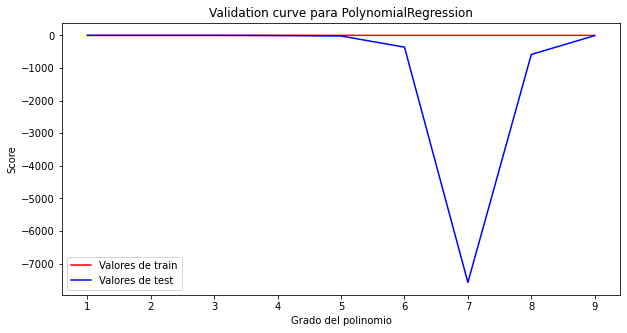

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(degree, np.mean(train_score, axis=1), c='r', label='Valores de train')
ax.plot(degree, np.mean(test_score, axis=1), c='b', label='Valores de test')
plt.xlabel('Grado del polinomio')
plt.ylabel('Score')
plt.title('Validation curve para PolynomialRegression')
plt.legend()
plt.show()

In [39]:
y_test_pred = model.predict(X_test[['LSTAT', 'RM']])
r2_score(y_test, y_test_pred)

0.6386331830560069

## Conclusión

Tomando las dos variables correlacionadas con el target y generando variables polinómicas de grado $5$ se obtiene un $R^2$ superior al obtenido entrenando el modelo con el dataset crudo. Además, el modelo no parece tener *overfitting*, ya que performa igualmente bien para datos con los que no entrenó.

In [40]:
raw_model = linear_model.LinearRegression().fit(X_train, y_train)
raw_model_score = raw_model.score(X_train, y_train)

best_model = PolynomialRegression(5).fit(X_train[['LSTAT', 'RM']], y_train)
best_model_score = best_model.score(X_train[['LSTAT', 'RM']], y_train)

print(f'Score para modelo crudo: {round(raw_model_score, 4)}')
print(f'Score para mejor modelo: {round(best_model_score, 4)}')
print('\n')

yt_pred_raw = raw_model.predict(X_test)
yt_pred_best = best_model.predict(X_test[['LSTAT', 'RM']])

print(f'Score de test para raw model: {r2_score(y_test, yt_pred_raw)}')
print(f'Score de test para best model: {r2_score(y_test, yt_pred_best)}')

Score para modelo crudo: 0.7708
Score para mejor modelo: 0.8268


Score de test para raw model: 0.657175726940427
Score de test para best model: 0.3689865724890067


Por lo tanto, si bien el modelo con *features* polinómicas tuvo un buen score de test en *cross-validation*, tiene una *performance* bastante mala con los datos de test. Probemos para grados menores del polinomio.

In [41]:
poly_model = PolynomialRegression(2).fit(X_train[['LSTAT', 'RM']], y_train)
poly_model_score = poly_model.score(X_train[['LSTAT', 'RM']], y_train)

print(f'Score para modelo crudo: {round(raw_model_score, 4)}')
print(f'Score para mejor modelo: {round(poly_model_score, 4)}')
print('\n')

yt_pred_raw = raw_model.predict(X_test)
yt_pred_poly = poly_model.predict(X_test[['LSTAT', 'RM']])

print(f'Score de test para raw model: {r2_score(y_test, yt_pred_raw)}')
print(f'Score de test para best model: {r2_score(y_test, yt_pred_poly)}')

Score para modelo crudo: 0.7708
Score para mejor modelo: 0.7753


Score de test para raw model: 0.657175726940427
Score de test para best model: 0.7045867327705594


En este caso, si bien el score del modelo con *features* polinómicas en *train* supera por muy poco al modelo crudo, sin embargo tiene mejores resultados para test.

---

# Árbol de regresión

Al principio del notebook se observó que el árbol de regresión sobre-ajustaba los datos, por lo que no era un modelo adecuado. En el caso particular de la separación entre train y test que hice en este dataset, los resultados para este modelo en test no fueron *tan* malos. Pero seteando otra semilla para la división, los resultados son bastante peores. A continuación haré un tuning de los hiperparámetros del modelo para ver si los resultados mejoran.

In [46]:
PARAMETROS = {
    'max_depth': [1,2,3,4,5,6],
    'max_features': [1,2,3,4],
    'max_leaf_nodes': [5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4],
    'min_samples_split': [2,3,4]
}

treereg = DecisionTreeRegressor(random_state=1)
gs = GridSearchCV(treereg, PARAMETROS, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
gs.fit(X_train, y_train)

C:\Users\joaqu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 2832 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 5184 out of 5184 | elapsed:    7.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=1,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': [1, 2, 3, 4],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
                         'min_sampl

In [48]:
print(gs.best_estimator_)
print(gs.best_score_)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=3,
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')
-24.054545692646077


In [49]:
treereg_gs = gs.best_estimator_
treereg_gs.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=3,
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [51]:
preds = treereg_gs.predict(X_train)
r2_score(y_train, preds)

0.7935102136062637

In [52]:
yt_pred = treereg_gs.predict(X_test)
print(r2_score(y_test, yt_pred))

0.5652396723140555
